# 数据清洗项目：WeRateDogs

## 一、数据收集：
1. 已经提供的数据：twitter-archive-enhanced.csv
2. 使用编程方法下载数据：twitter图像的预测数据
3. 使用编程方法爬取每条推特的额外数据

In [525]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tweepy as tp
import json
import requests
%matplotlib inline
pd.set_option('max_colwidth', 200)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

### 1. 已提供的数据

In [526]:
archive = pd.read_csv('./data/twitter-archive-enhanced.csv')

In [527]:
archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,nan,nan,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,nan,nan,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,nan,nan,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",nan,nan,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,nan,nan,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,nan,nan,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,nan,nan,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,nan,nan,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,nan,nan,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",nan,nan,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None
5,891087950875897856,nan,nan,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,nan,nan,NaN,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13,10,None,None,None,None,None
6,890971913173991426,nan,nan,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,nan,nan,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",13,10,Jax,None,None,None,None
7,890729181411237888,nan,nan,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,nan,nan,NaN,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",13,10,None,None,None,None,None
8,890609185150312448,nan,nan,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,nan,nan,NaN,https://twitter.com/dog_rates/status/890609185150312448/photo/1,13,10,Zoey,None,None,None,None
9,89024025534

### 2. 使用编程方法下载数据：twitter图像的预测数据

In [528]:
url = 'https://raw.githubusercontent.com/udacity/\
new-dand-advanced-china/master/%E6%95%B0%E6%8D%AE%E6%B8%85%E6%B4%97/\
WeRateDogs%E9%A1%B9%E7%9B%AE/image-predictions.tsv'
with open ('./data/image_predictions.tsv', 'w') as file:
    response = requests.get(url)
    file.write(response.text)
# 查看文件，确认下载成功

In [529]:
with open ('./data/image_predictions.tsv','r') as file:
    images = pd.read_csv(file, sep='\t')

In [530]:
images[:5]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465,True,collie,0.157,True,Shetland_sheepdog,0.061,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.507,True,miniature_pinscher,0.074,True,Rhodesian_ridgeback,0.072,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596,True,malinois,0.139,True,bloodhound,0.116,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408,True,redbone,0.361,True,miniature_pinscher,0.223,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560,True,Rottweiler,0.244,True,Doberman,0.155,True


### 3. 使用编程方法爬取每条推特的额外数据

In [531]:
# 需要tweepy的使用权限
# 由于暂时无法使用API，所以就直接使用下载的文件 tweet_json.txt
extra_list = []
with open ('./data/tweet_json.txt') as file:
    for line in file:
        tweet = json.loads(line)
        tweet_id = tweet['id_str']
        retweet_count = tweet['retweet_count']
        favorite_count = tweet['favorite_count']
        extra_list.append({
            'tweet_id': tweet_id,
            'retweet_count': retweet_count,
            'favorite_count': favorite_count
        })
extra = pd.DataFrame(extra_list, columns=['tweet_id', 'retweet_count', 'favorite_count'])

In [532]:
extra.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8842,39492
1,892177421306343426,6480,33786
2,891815181378084864,4301,25445
3,891689557279858688,8925,42863
4,891327558926688256,9721,41016


## 二、 数据评估
**写在前面：在这两千多条数据中，大多数twitter文本都只提到了一只狗。但有少数有两条多或条狗，这就对应了多个name，多个特征，多个分数。如果要进行细致的评估和清洗，多个参数也是要分开的，但是这个过程过于冗杂，有时还需要逐条查阅文本内容。考虑到以上情况，为了方便起见，除了狗的名字（name）考虑了多个名字的情况，狗的特征和狗的分数都不再考虑存在多个的情况，而是只取第一个。**

### 1. 目测评估
直接观察这三个数据表格并找出其中的质量问题和整洁度问题

In [533]:
archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,nan,nan,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,nan,nan,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,nan,nan,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",nan,nan,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,nan,nan,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,nan,nan,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,nan,nan,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,nan,nan,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,nan,nan,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",nan,nan,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None
5,891087950875897856,nan,nan,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,nan,nan,NaN,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13,10,None,None,None,None,None
6,890971913173991426,nan,nan,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,nan,nan,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",13,10,Jax,None,None,None,None
7,890729181411237888,nan,nan,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,nan,nan,NaN,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",13,10,None,None,None,None,None
8,890609185150312448,nan,nan,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,nan,nan,NaN,https://twitter.com/dog_rates/status/890609185150312448/photo/1,13,10,Zoey,None,None,None,None
9,89024025534

#### 1.1 archive的质量问题：
- in_reply_to_status_id和inply_to_user_id两列有大量的空值（NaN）
- retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp三列有大量的空值（NaN）
- rating_numerator和rating_denominator这两列有有些值是明显错误的（如分子为1分母为2）
- name列有些是错误的，例如，a,an
- name, doggo, floofer, pupper, puppo这四列中的None应该是NaN
- text列包含没用的网址，可以删除

#### 1.2 archive的整洁度问题：
- 应该把这三个表格合并成一个表格
- source这一列中的值似乎完全相同，没有存在的必要
- expanded_urls这一列没有存在的必要
- doggo, floofer,	pupper,	puppo这四列可以合并成一列

In [534]:
images

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465,True,collie,0.157,True,Shetland_sheepdog,0.061,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.507,True,miniature_pinscher,0.074,True,Rhodesian_ridgeback,0.072,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596,True,malinois,0.139,True,bloodhound,0.116,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408,True,redbone,0.361,True,miniature_pinscher,0.223,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560,True,Rottweiler,0.244,True,Doberman,0.155,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651,True,English_springer,0.264,True,Greater_Swiss_Mountain_dog,0.016,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933,False,mud_turtle,0.046,False,terrapin,0.018,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.693,True,Tibetan_mastiff,0.058,True,fur_coat,0.054,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962,False,shopping_basket,0.015,False,golden_retriever,0.008,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201,True,komondor,0.192,True,soft-coated_wheaten_terrier,0.082,True


#### 1.3 images的质量和整洁度问题：
- 狗的名字格式不统一

#### 1.4 extra的质量问题和整洁度问题：没有问题

### 2. 编程评估

In [535]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [536]:
archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2356.000,78.000,78.000,181.000,181.000,2356.000,2356.000
mean,742771590321719808.000,745507917855750656.000,20141706360873208.000,772039961038007040.000,12416983653017580.000,13.126,10.455
std,68567047444761032.000,75824920044192880.000,125279666255236320.000,62369278105055600.000,95992535331517536.000,45.877,6.745
min,666020888022790144.000,665814696700723200.000,11856342.000,666104133288665088.000,783214.000,0.000,0.000
25%,678398938214475776.000,675741911993464832.000,308637448.750,718631497683582976.000,4196983835.000,10.000,10.000
50%,719627934716235776.000,703870840226598912.000,4196983835.000,780465709297995776.000,4196983835.000,11.000,10.000
75%,799337304954252288.000,825780371286566912.000,4196983835.000,820314633777061888.000,4196983835.000,12.000,10.000
max,892420643555336192.000,886266357075128320.000,840547864354918400.000,887473957103951872.000,787461778435289088.000,1776.000,170.000


#### 2.1 archive的质量问题：
- timestamp列的数据类型
- tweet_id，in_reply...,retweeted...共5列应该是string类型
- 狗的分数存在错误

In [537]:
images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [538]:
images.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2075.000,2075.000,2075.000,2075.000,2075.000
mean,738451357852539008.000,1.204,0.595,0.135,0.060
std,67852033330235656.000,0.562,0.271,0.101,0.051
min,666020888022790144.000,1.000,0.044,0.000,0.000
25%,676483507139540992.000,1.000,0.364,0.054,0.016
50%,711998809858043904.000,1.000,0.588,0.118,0.049
75%,793203448525178880.000,1.000,0.844,0.196,0.092
max,892420643555336192.000,4.000,1.000,0.488,0.273


#### 2.2 images的质量问题和整洁度问题：
- tweet_id列数据类型应该是string

In [539]:
extra.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2352 entries, 0 to 2351
Data columns (total 3 columns):
tweet_id          2352 non-null object
retweet_count     2352 non-null int64
favorite_count    2352 non-null int64
dtypes: int64(2), object(1)
memory usage: 55.2+ KB


In [540]:
extra.describe()

,retweet_count,favorite_count
count,2352.000,2352.000
mean,3134.932,8109.199
std,5237.846,11980.796
min,0.000,0.000
25%,618.000,1417.000
50%,1456.500,3596.500
75%,3628.750,10118.000
max,79116.000,132318.000


#### 2.3 extra的质量问题和整洁度问题：没有明显问题

## 三、数据清洗

三个数据表格的问题总结：
- archive质量问题:  
    - in_reply_to_status_id和inply_to_user_id两列有大量的空值（NaN）
    - retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp三列有大量的空值（NaN）
    - rating_numerator和rating_denominator这两列有有些值是明显错误的（如分子为1分母为2）
    - name列有些是错误的，例如，a,an
    - name, doggo, floofer, pupper, puppo这四列中的None应该是NaN
    - timestamp列的数据类型
    - tweet_id，in_reply...,retweeted...共5列应该是string类型
    - 狗的分数存在错误
- archive整洁度问题：
    - 应该把这三个表格合并成一个表格
    - source这一列中的值似乎完全相同，没有存在的必要
    - expanded_urls这一列没有存在的必要
    - doggo, floofer, pupper, puppo这四列可以合并成一列
- images质量和整洁度问题：
    - tweet_id列数据类型应该是string

In [590]:
archive_clean = archive.copy()
images_clean = images.copy()

### 1. archive的in_reply和retweeted中有大量的空值
    - 定义：需要查看一下这几列是因为什么原因导致的空值这么多，非空值的行有哪些
    - 代码：

In [591]:
reply = archive_clean[archive_clean.in_reply_to_status_id.notnull()]

In [592]:
retweet = archive_clean[archive_clean.retweeted_status_id.notnull()]

in_reply不为空的行表示这条twitter是回复给其他人的，
<br>
retweet不为空的行表示这条twitter是转发的，而其他的都是原创的。
<br>
删除回复和转推所在的行，并删除这几个空值太多的列。

In [593]:
archive_clean = archive_clean.drop(reply.index, axis=0)

In [594]:
archive_clean = archive_clean.drop(retweet.index, axis=0)

In [595]:
archive_clean = archive_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id'],axis=1)

In [596]:
archive_clean = archive_clean.drop(['retweeted_status_id', 'retweeted_status_timestamp',
                                    'retweeted_status_user_id'], axis=1)

In [597]:
# 测试
archive_clean

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None
5,891087950875897856,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13,10,None,None,None,None,None
6,890971913173991426,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",13,10,Jax,None,None,None,None
7,890729181411237888,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",13,10,None,None,None,None,None
8,890609185150312448,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,https://twitter.com/dog_rates/status/890609185150312448/photo/1,13,10,Zoey,None,None,None,None
9,890240255349198849,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Cassie. She is a college pup. Studying international doggo communication and stick theory. 14/10 so elegant much sophisticate https://t.co/t1bfwz5S2A,https://twitt

## 2. 把tweet_id列转成string格式

In [598]:
archive_clean.tweet_id = archive_clean.tweet_id.astype(str)

In [602]:
# 测试
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2097 non-null object
timestamp             2097 non-null object
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
dtypes: int64(2), object(10)
memory usage: 293.0+ KB


### 3. name列有一些是错误的
    - 定义：
        - 提取的狗名字首字母是小写的都是错的。
        - 应该把没有提取出名字的name值设定为NaN
        - 狗的名字应该是首字母大写，而且前面是“This is”, “name is”,“named”,“hello to”, 以及“Meet”。用这个规则，使用extract方法来提取狗的名字。
        - 另外有些是两个名字，这些稍后处理。
    - 代码：

In [603]:
# 重新提取狗的名字
re = r'(?P<name>(?:(?<=Meet)|(?<=is)|(?<=named)|(?<=hello to))\s[A-Z][a-z]+)'
new_names = archive_clean.text.str.extract(re)
new_names

,name
0,Phineas
1,Tilly
2,Archie
3,Darla
4,Franklin
5,NaN
6,Jax
7,NaN
8,Zoey
9,Cassie


In [604]:
# 去掉原来的name列
archive_clean = archive_clean.drop('name', axis=1)

In [605]:
# 将新的name列加上
archive_clean = pd.concat([archive_clean, new_names], axis=1)

In [606]:
# 测试
archive_clean.name

0         Phineas
1           Tilly
2          Archie
3           Darla
4        Franklin
5             NaN
6             Jax
7             NaN
8            Zoey
9          Cassie
10           Koda
11          Bruno
12            NaN
13            Ted
14         Stuart
15         Oliver
16            Jim
17           Zeke
18        Ralphus
20         Gerald
21        Jeffrey
22            NaN
23         Canela
24            NaN
25            NaN
26           Maya
27         Mingus
28          Derek
29         Roscoe
31        Waffles
          ...    
2326          NaN
2327          NaN
2328          NaN
2329          NaN
2330          NaN
2331          NaN
2332          NaN
2333          NaN
2334          NaN
2335          NaN
2336          NaN
2337          NaN
2338          NaN
2339          NaN
2340          NaN
2341          NaN
2342          NaN
2343          NaN
2344          NaN
2345          NaN
2346          NaN
2347          NaN
2348          NaN
2349          NaN
2350      

In [607]:
# 测试：没有提取出名字的text是否真的没有狗的名字
x= archive_clean[archive_clean.name.isnull()].text
x[x.str.contains('name')]
# 结果发现我们遗漏了两个，这两个比较特殊。

1596                                               When bae calls your name from across the room. 12/10 (vid by @christinemcc98) https://t.co/xolcXA6gxe
2086                                I would do radical things in the name of Dog God. I'd believe every word in that book. 10/10 https://t.co/9ZuGAmLZDR
2306    These are Peruvian Feldspars. Their names are Cupit and Prencer. Both resemble Rand Paul. Sick outfits 10/10 &amp; 10/10 https://t.co/ZnEMHBsAs1
Name: text, dtype: object

In [608]:
# 加上遗漏的两个
archive_clean.at[149,'name'] = 'Pipsy'
archive_clean.at[2306, 'name'] = 'Cupit and Prencer'

In [609]:
# 测试：有没有两个名字的情况
two_names_extract = archive_clean.text.str.extract(r'([A-Z][a-z]+ and [A-Z][a-z]+)')
two_names = two_names_extract[two_names_extract[0].notnull()]
two_names
# 看来还是有不少的，用这些值替换原来的name列中的值

,0
87,Nugget and Hank
178,Oscar and Oliver
257,Sadie and Daisy
276,Maddie and Gunner
375,Beebop and Doobert
377,Brutus and Jersey
443,Anna and Elsa
507,Brandi and Harley
548,Sansa and Gary
578,Mauve and Murphy


In [610]:
# 给两个名字的赋值
archive_clean.at[two_names.index, 'name'] = two_names[0]

In [611]:
# 测试
archive_clean[archive_clean.name.isnull()].name

5       NaN
7       NaN
12      NaN
22      NaN
24      NaN
25      NaN
37      NaN
41      NaN
42      NaN
47      NaN
56      NaN
59      NaN
62      NaN
72      NaN
83      NaN
88      NaN
89      NaN
93      NaN
96      NaN
99      NaN
100     NaN
103     NaN
110     NaN
112     NaN
125     NaN
127     NaN
131     NaN
133     NaN
141     NaN
154     NaN
       ... 
2326    NaN
2327    NaN
2328    NaN
2329    NaN
2330    NaN
2331    NaN
2332    NaN
2333    NaN
2334    NaN
2335    NaN
2336    NaN
2337    NaN
2338    NaN
2339    NaN
2340    NaN
2341    NaN
2342    NaN
2343    NaN
2344    NaN
2345    NaN
2346    NaN
2347    NaN
2348    NaN
2349    NaN
2350    NaN
2351    NaN
2352    NaN
2353    NaN
2354    NaN
2355    NaN
Name: name, Length: 657, dtype: object

经过清洗，name这一列中仍有797个空值，这些是因为text中没有提到狗的名字。

### 4. 狗的特征一个变量占用了四格
    - 定义：使用melt方法将特征整理成一列。需要注意：
        - 应该用NaN代替原来的None
        - 有几个狗是有两个特征的，为了方便处理，只保留第一个。
    - 代码：

In [612]:
archive_clean

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,doggo,floofer,pupper,puppo,name
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13.000,10.000,None,None,None,None,Phineas
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13.000,10.000,None,None,None,None,Tilly
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12.000,10.000,None,None,None,None,Archie
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13.000,10.000,None,None,None,None,Darla
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12.000,10.000,None,None,None,None,Franklin
5,891087950875897856,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13.000,10.000,None,None,None,None,NaN
6,890971913173991426,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",13.000,10.000,None,None,None,None,Jax
7,890729181411237888,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",13.000,10.000,None,None,None,None,NaN
8,890609185150312448,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,https://twitter.com/dog_rates/status/890609185150312448/photo/1,13.000,10.000,None,None,None,None,Zoey
9,890240255349198849,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Cassie. She is a college pup. Studying international doggo communication and stick theory. 14

In [613]:
# 将None替换成NaN
archive_clean.loc[:, 'doggo':'puppo'] = archive_clean.loc[:, 'doggo':'puppo'].replace('None', np.nan)

In [614]:
columns_except_feature = ['tweet_id',
       'timestamp',
       'source',
       'text',
       'expanded_urls',
       'rating_numerator',
       'rating_denominator',
       'name']
dogs_feature = pd.melt(archive_clean, id_vars=columns_except_feature, var_name='feature')
# 去掉特征值为空的行
dogs_feature = dogs_feature[dogs_feature.value.notnull()]
dogs_feature = dogs_feature[['tweet_id', 'feature']]

In [615]:
"""
由于有重复index，所以merge之后的archive会多出几行，
为了方便（但不准确）起见，只保留第一个特征。
"""
archive_clean = pd.merge(archive_clean, dogs_feature, how='left', on='tweet_id')

In [616]:
# 去掉原来的特征列
archive_clean = archive_clean.drop(['doggo','pupper', 'puppo', 'floofer'], axis=1)

In [617]:
# 去掉tweet_id重复的行
archive_clean = archive_clean.drop_duplicates(['tweet_id'])

In [618]:
# 重设archive_clean的index
archive_clean = archive_clean.reset_index(drop=True)

In [619]:
# 测试
archive_clean

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,feature
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13.000,10.000,Phineas,NaN
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13.000,10.000,Tilly,NaN
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12.000,10.000,Archie,NaN
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13.000,10.000,Darla,NaN
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12.000,10.000,Franklin,NaN
5,891087950875897856,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13.000,10.000,NaN,NaN
6,890971913173991426,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",13.000,10.000,Jax,NaN
7,890729181411237888,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",13.000,10.000,NaN,NaN
8,890609185150312448,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,https://twitter.com/dog_rates/status/890609185150312448/photo/1,13.000,10.000,Zoey,NaN
9,890240255349198849,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Cassie. She is a college pup. Studying international doggo communication and stick theory. 14/10 so elegant much sophisticate https://t.co/t1bfwz5S2A,https://twitter.com/dog_rates/status/890240255349198849/photo/1,14.000,10.000,Cassie,doggo


### 5. 对于狗的评分的提取
    - 定义：狗的评分有一些错误的地方。下面重新从text中提取分数.
        - 使用extract方法
        - 提取的规则是:\d{0,2}\.?\d{1,3})/[1-9]{1,2}0，即分子是1-3位的数字(可以是小数），分母是以0结尾的1-3的数字（但不能是0）
        - 然后删除原来的分数列
        - 再把重新提取的分数列merge上去
        - 把分数列的数据类型改成int
        - 最后再把分母不是10的行转换为分母为10的分数
    - 代码：
        

In [620]:
score_re = r'(?P<rating_numerator>(?:\d\.)?\d{1,3})/(?P<rating_denominator>[1-9]{1,2}0)'
score = archive_clean.text.str.extract(score_re, expand=False)
archive_clean = archive_clean.drop(['rating_numerator', 'rating_denominator'], axis=1)
archive_clean = pd.merge(archive_clean, score, left_index=True, right_index=True, how='left')

In [621]:
archive_clean.rating_denominator = archive_clean.rating_denominator.astype(float, errors='ignore')
archive_clean.rating_numerator = archive_clean.rating_numerator.astype(float,errors='ignore')

In [622]:
# 把分母不是10的转变为分母为10的分数（改变分子）
def unify(group):
    return group.rating_numerator / (group.rating_denominator / 10)
archive_clean.rating_numerator = archive_clean.apply(unify, axis=1)

In [623]:
# 把分母统一为10
archive_clean.at[:, 'rating_denominator'] = 10.0

In [624]:
# 测试
archive_clean.rating_denominator.value_counts()

10.000    2098
Name: rating_denominator, dtype: int64

In [625]:
archive_clean.rating_numerator.value_counts()

12.000     490
10.000     439
11.000     418
13.000     287
9.000      154
8.000       98
7.000       51
14.000      39
5.000       33
6.000       32
3.000       19
4.000       15
2.000       10
1.000        4
9.750        1
0.000        1
1.260        1
1.270        1
3.500        1
776.000      1
420.000      1
Name: rating_numerator, dtype: int64

### 6. 删除无用的source和expanded_urls列

In [626]:
archive_clean = archive_clean.drop(['source', 'expanded_urls'], axis=1)

In [627]:
# 测试
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2098 entries, 0 to 2097
Data columns (total 7 columns):
tweet_id              2097 non-null object
timestamp             2097 non-null object
text                  2097 non-null object
name                  1441 non-null object
feature               336 non-null object
rating_numerator      2096 non-null float64
rating_denominator    2098 non-null float64
dtypes: float64(2), object(5)
memory usage: 114.8+ KB


### 7. 修改timestamp为timedate类型

In [628]:
archive_clean.timestamp = pd.to_datetime(archive_clean.timestamp)

In [629]:
# 测试
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2098 entries, 0 to 2097
Data columns (total 7 columns):
tweet_id              2097 non-null object
timestamp             2097 non-null datetime64[ns]
text                  2097 non-null object
name                  1441 non-null object
feature               336 non-null object
rating_numerator      2096 non-null float64
rating_denominator    2098 non-null float64
dtypes: datetime64[ns](1), float64(2), object(4)
memory usage: 114.8+ KB


In [630]:
# 测试
archive_clean.timestamp.head()

0   2017-08-01 16:23:56
1   2017-08-01 00:17:27
2   2017-07-31 00:18:03
3   2017-07-30 15:58:51
4   2017-07-29 16:00:24
Name: timestamp, dtype: datetime64[ns]

### 8. 修改images表格的tweet_id为string类型

In [631]:
images_clean.tweet_id = images_clean.tweet_id.astype(str)

In [632]:
images_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


### 9. images表格狗的名字格式不统一
统一成：中间没有“_”，且首字母大写(由于只用到p1列，所以只清洗p1列）

In [633]:
images_clean.p1 = images_clean.p1.str.replace('_', ' ')

In [634]:
images_clean.p1 = images_clean.p1.str.title()

In [635]:
# 测试
images_clean.p1[:5]

0    Welsh Springer Spaniel
1                   Redbone
2           German Shepherd
3       Rhodesian Ridgeback
4        Miniature Pinscher
Name: p1, dtype: object

### 11. 最后，images表格和extra表格可以合并到archive表格，使用merge方法。

In [639]:
archive_clean.tweet_id = archive_clean.tweet_id.astype(str)
archive_clean = pd.merge(archive_clean, images_clean, on='tweet_id')

In [640]:
archive_clean = pd.merge(archive_clean, extra, on='tweet_id')

In [641]:
# 测试
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 1970
Data columns (total 20 columns):
tweet_id              1971 non-null object
timestamp             1971 non-null datetime64[ns]
text                  1971 non-null object
name                  1397 non-null object
feature               303 non-null object
rating_numerator      1970 non-null float64
rating_denominator    1971 non-null float64
jpg_url               1971 non-null object
img_num               1971 non-null int64
p1                    1971 non-null object
p1_conf               1971 non-null float64
p1_dog                1971 non-null bool
p2                    1971 non-null object
p2_conf               1971 non-null float64
p2_dog                1971 non-null bool
p3                    1971 non-null object
p3_conf               1971 non-null float64
p3_dog                1971 non-null bool
retweet_count         1971 non-null int64
favorite_count        1971 non-null int64
dtypes: bool(3), datetime64[ns

清洗完成，可以修改原变量。最后我们用到的只有archive这个变量。

In [642]:
archive = archive_clean
images = images_clean

In [643]:
# 保存清洗后的数据
archive.to_csv('./data/twitter_archive_master.csv')

## 四、数据分析与可视化

### 1. 单变量统计分析
单变量统计分析主要包括：
- 狗的名字占比的统计
- 狗的特征占比的统计
- 狗的分数的占比统计
- 狗的种类的占比统计

In [644]:
archive.describe()

,rating_numerator,rating_denominator,img_num,p1_conf,p2_conf,p3_conf,retweet_count,favorite_count
count,1970.000,1971.000,1971.000,1971.000,1971.000,1971.000,1971.000,1971.000
mean,11.123,10.000,1.202,0.595,0.135,0.060,2787.830,8977.031
std,19.678,0.000,0.559,0.272,0.101,0.051,4739.183,12456.034
min,0.000,10.000,1.000,0.044,0.000,0.000,15.000,81.000
25%,10.000,10.000,1.000,0.363,0.053,0.016,627.000,1992.000
50%,11.000,10.000,1.000,0.588,0.117,0.049,1362.000,4128.000
75%,12.000,10.000,1.000,0.848,0.196,0.092,3224.500,11367.000
max,776.000,10.000,4.000,1.000,0.488,0.273,79116.000,132318.000


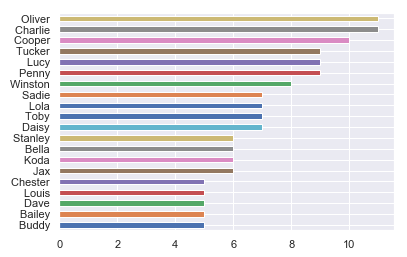

In [645]:
# 狗的名字占比统计
archive.name.value_counts()[:20].sort_values().plot(kind='barh')

狗的名字Top5是：Oliver, Charile, Cooper, Tucker, Lucy

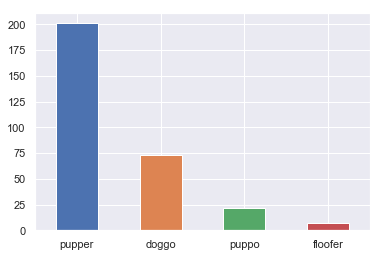

In [646]:
# 狗的特征占比统计
archive.feature.value_counts().plot(kind='bar', rot=0)

推主提到的pupper最多，果然小狗最受欢迎啊

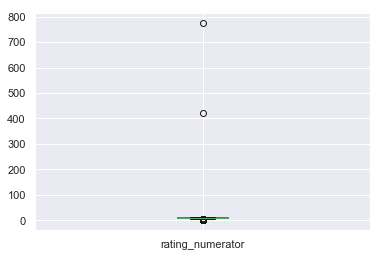

In [647]:
# 狗的分数占比统计
archive.rating_numerator.plot(kind='box')

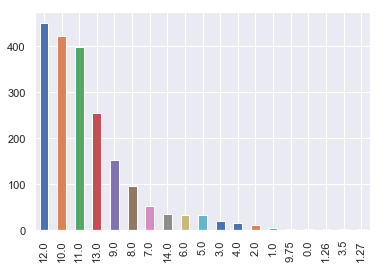

In [648]:
# 由于有少数值多大，先排除这些值，再统计
archive[archive.rating_numerator < 20].rating_numerator.value_counts().plot(kind='bar')

推主给大多数狗的评分数10-13分，绝大多数都在2-14之间。

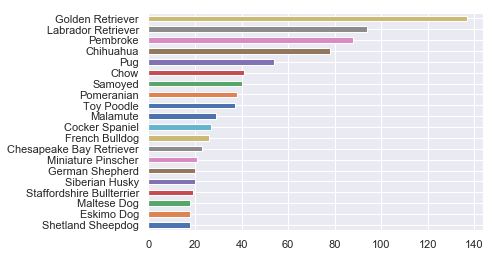

In [649]:
# 狗的种类的统计
archive[archive.p1_dog == True].p1.value_counts()[:20].sort_values().plot(kind='barh')

推主评分的狗种类Top5是：金毛，拉布拉多，Pembroke柯基，吉娃娃，八哥

### 2. 相关性分析
包括：
- 转推数与狗评分的关系
- favorite与狗评分的关系
- 品种与狗评分的关系
- 品种与转推和favorite之间的关系

In [650]:
# 狗的分数大多集中在2-14，评分过低或过高意义不大
archive = archive.query('rating_numerator <= 14 & rating_numerator >= 2')

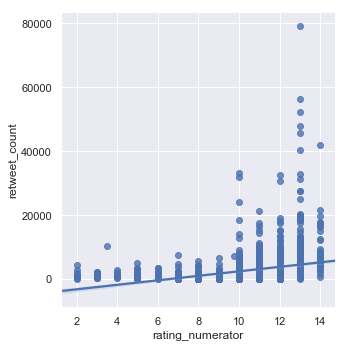

In [651]:
# 转推数与狗评分的关系
sns.set(color_codes=True)
sns.lmplot(y='retweet_count', x='rating_numerator', data=archive)

从结果上看，转推数与评分有一定的正相关关系。狗的评分越高，相应的转推数就会越多。

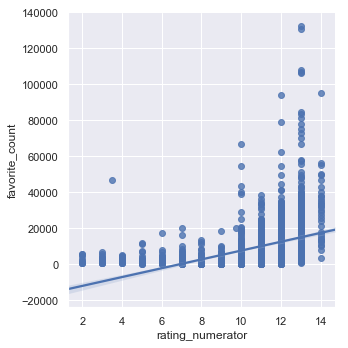

In [652]:
# favorite与评分之间的关系
sns.lmplot(y='favorite_count', x='rating_numerator', data=archive)

从结果上看，favorite与评分有一定的正相关关系。狗的评分越高，相应的favorite数就越多。

In [653]:
# 品种与狗评分的关系。由于狗的品种太多，只选择数量排名前30的品种进行分析
top30 = archive[archive.p1_dog == True].p1.value_counts()[:30]

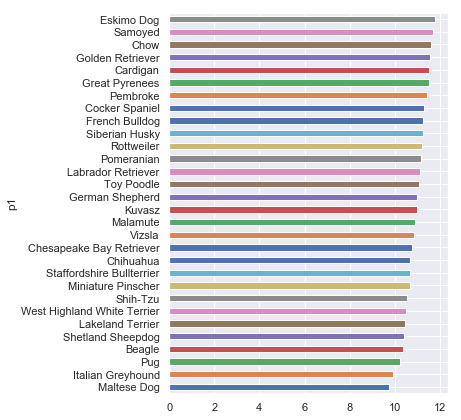

In [654]:
top30_rating = archive[archive.p1.isin(top30.index)].groupby('p1').rating_numerator.mean().sort_values()
top30_rating.plot(kind='barh', figsize=(5, 7))

结果显示，评分高的狗品种Top5是：爱斯基摩犬，萨摩耶，松狮犬，金毛猎犬和Cardigan柯基。看来金毛作为出现频次最高的狗评分也是相当高的。

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  


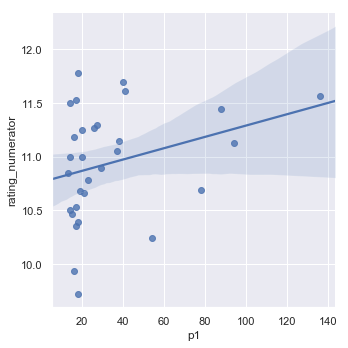

In [655]:
# 某个品种的狗的数量与其平均得分之间的关系
p1_rating = pd.concat([top30, top30_rating], axis=1)
sns.lmplot(x='p1', y='rating_numerator', data=p1_rating)

从上图看出，某个品种的狗的数量与其平均得分之间呈正相关。即推主评分较多的狗品种其分数相对较高。

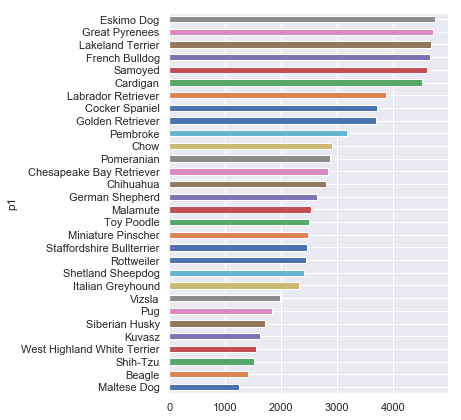

In [656]:
# 看一下品种与转推之间的关系
top30_retweet = archive[archive.p1.isin(top30.index)].groupby('p1').retweet_count.mean().sort_values()
top30_retweet.plot(kind='barh', figsize=(5, 7))

结果：转推数前5的狗品种是：爱斯基摩犬，大白熊犬，湖畔梗，法斗，萨摩耶

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  


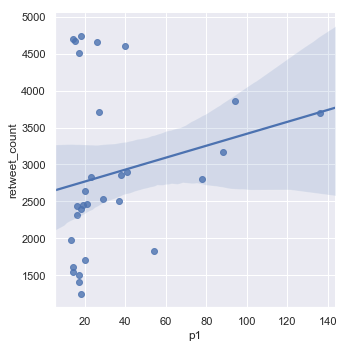

In [657]:
# 品种与转推之间的关系
p1_retweet = pd.concat([top30, top30_retweet], axis=1)
sns.lmplot(x='p1', y='retweet_count', data=p1_retweet)

结果：两者也是存在一定的正相关关系，即数量较多的狗品种对应的转推数也较多。

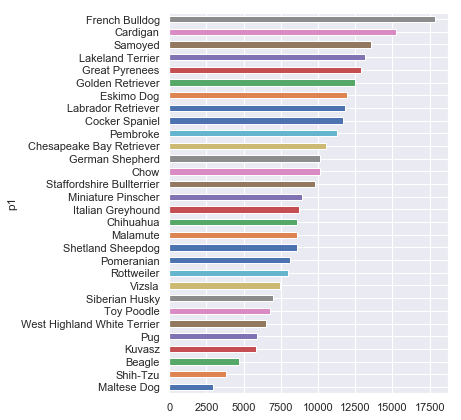

In [658]:
# 看一下品种与favorite之间的关系
top30_favorite = archive[archive.p1.isin(top30.index)].groupby('p1').favorite_count.mean().sort_values()
top30_favorite.plot(kind='barh', figsize=(5, 7))

结果：favorite数前5的狗品种是：法斗，Cardigan柯基，萨摩耶，湖畔梗，大白熊犬

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  


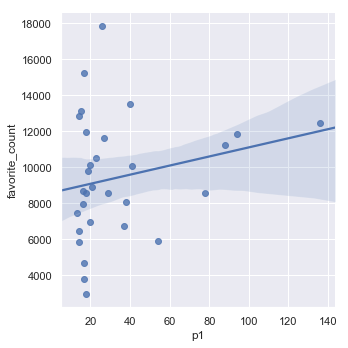

In [659]:
# 品种与favorite之间的关系
p1_favorite = pd.concat([top30, top30_favorite], axis=1)
sns.lmplot(x='p1', y='favorite_count', data=p1_favorite)

结果：两者也是存在一定的正相关关系，即数量较多的狗品种对应的favorite数也较多。

## 总结：
-	狗的名字出现最多的的是Oliver, Charile, Cooper, Tucker, Lucy
-	小狗（pupper）最多。
-	推主给大多数狗的评分数10-13分，绝大多数都在2-14之间。
-	推主评分的狗种类Top5是：金毛，拉布拉多，Pembroke柯基，吉娃娃，八哥
-	转推数以及favorite与评分有一定的正相关关系。狗的评分越高，相应的转推数和favorite就会越多。
-	评分高的狗品种Top5是：爱斯基摩犬，萨摩耶，松狮犬，金毛猎犬和Cardigan柯基。看来金毛作为出现频次最高的狗评分也是相当高的。
-	转推数前5的狗品种是：爱斯基摩犬，大白熊犬，湖畔梗，法斗，萨摩耶。
-	favorite数前5的狗品种是：法斗，Cardigan柯基，萨摩耶，湖畔梗，大白熊犬。
-	转推数和favorite与这个品种狗的数量存在一定的正相关关系，即数量较多的狗品种对应的转推数也较多。
-	综合以上结果，我认为推主最喜欢的狗是**金毛**，大众最喜欢的狗是**法斗**。


![金毛](https://upload.wikimedia.org/wikipedia/commons/3/37/20141123Golden_Retriever-feifei.jpg)